# Execute Simple NN

In [26]:
import torch
import torchvision
import matplotlib.pyplot as plt
import time

In [27]:
class TwoLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.
    """
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)

  def forward(self, x):
    """
    In the forward function we accept a Tensor of input data and we must return
    a Tensor of output data. We can use Modules defined in the constructor as
    well as arbitrary (differentiable) operations on Tensors.
    """
    h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred

In [28]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above.
model = TwoLayerNet(D_in, H, D_out)

In [29]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
data = []
for t in range(500):
  # Forward pass: Compute predicted y by passing x to the model
  y_pred = model(x)

  # Compute and print loss
  loss = loss_fn(y_pred, y)
  print(t, loss.item())
  data.append(loss.item())

  # Zero gradients, perform a backward pass, and update the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


0 638.778076171875
1 593.0502319335938
2 553.2533569335938
3 518.1912841796875
4 487.2286071777344
5 459.09832763671875
6 433.2527160644531
7 409.3747253417969
8 387.43609619140625
9 367.23565673828125
10 348.42303466796875
11 330.5686950683594
12 313.7494812011719
13 297.8574523925781
14 282.7325439453125
15 268.2336730957031
16 254.42123413085938
17 241.26051330566406
18 228.6878662109375
19 216.69647216796875
20 205.2600860595703
21 194.30567932128906
22 183.8417205810547
23 173.85821533203125
24 164.35765075683594
25 155.29368591308594
26 146.64447021484375
27 138.42742919921875
28 130.626220703125
29 123.18406677246094
30 116.11222076416016
31 109.40447998046875
32 103.04196166992188
33 97.01187896728516
34 91.31822204589844
35 85.93643188476562
36 80.8519515991211
37 76.03863525390625
38 71.49861145019531
39 67.22606658935547
40 63.19988250732422
41 59.40650939941406
42 55.83599853515625
43 52.47627258300781
44 49.308597564697266
45 46.334747314453125
46 43.54628372192383
47 40.9

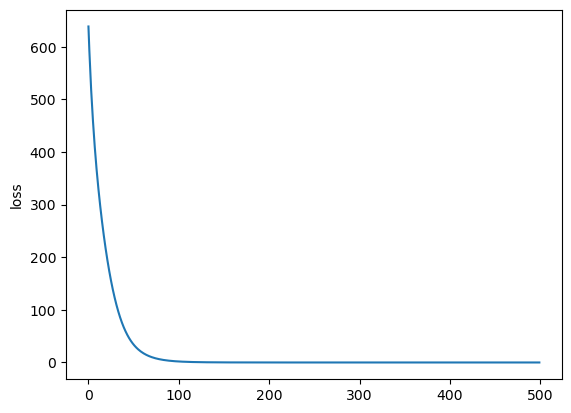

In [30]:
plt.plot(data)
plt.ylabel('loss')
plt.show()

# Assignment 1

Preparation of dataset

In [31]:
num_epochs = 50
batch_size_training = 64
batch_size_testing = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
device = torch.device("cpu")

Dataloader
Normalisieren des Inputs/der Bilder

In [32]:
# 0.1307 0.3081 global mean and global std div

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_training, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_testing, shuffle=True)

Beispieldaten anschauen

In [33]:
# test data set from test_loader
examples = enumerate(test_loader)

# one batch 1000 elements
# example_data: image
# example_targets: number 
batch_idx, (example_data, example_targets) = next(examples)

In [34]:
# 1000 images
# 1 channel
# 28x28
example_data.shape

torch.Size([1000, 1, 28, 28])

Flatten der Daten mit PyTorch testen

In [35]:
# flatten one batch
flat = torch.flatten(example_data, start_dim=1)
flat.shape

torch.Size([1000, 784])

Beispieldaten visualisieren

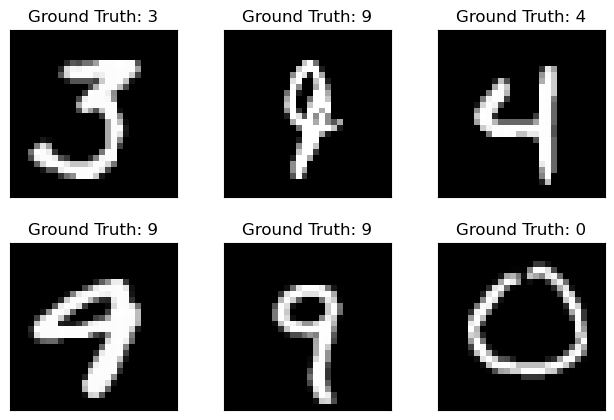

In [36]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
#fig

## Erstellen des MNIST Netzes für die CPU

In [37]:
# Construct model with 28*28 input, 100 neuron hidden layer, and 10 neuron output layer
network = TwoLayerNet(28*28, 100, 10)

# Init optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [38]:
# lists holding training data
train_losses = []
train_counter = []
test_losses = []
# number for each training pass
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [39]:
def train(epoch):
  #network.train()

  loss_fn = torch.nn.NLLLoss()
  for batch_idx, (data, target) in enumerate(train_loader):
    # Set gradient to zero
    optimizer.zero_grad()
      
    # Forward pass
    # Flatten image
    # Softmax output
    flat_data = torch.flatten(data, start_dim=1)
    raw_output = network(flat_data)
    output = torch.nn.functional.log_softmax(raw_output, dim=1)

    # Compute loss
    loss = torch.nn.functional.nll_loss(output, target)

    # Zero gradients, perform a backward pass, and update the weights.
    #optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

Netz trainieren

In [40]:
# set the device for training
network.to(device)

# meassure time
start = time.time()
# train the network
for epoch in range(1, num_epochs + 1):
  train(epoch)
end = time.time()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.346312
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.061338
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.787498
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.563534
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.323617
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.157442
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.067432
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.896387
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.772468
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.583144
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.607685
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.453165
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.664993
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.581345
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.789183
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.552753
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.481114
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.365733
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.468975
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.505924
Train Epoch: 1 [12800/60000 (

Elapsed Time

In [41]:
print(str(end - start) + "s")

616.5496289730072s


## Erstellen des MNIST Netzes für die GPU

In [42]:
def train_gpu(epoch):
  #network.train()

  loss_fn = torch.nn.NLLLoss()
  for batch_idx, (data, target) in enumerate(train_loader):
    # Set gradient to zero
    optimizer.zero_grad()

    # if training of gpu transfer data
    data = data.to(device)
    target = target.to(device)
      
    # Forward pass
    # Flatten image
    # Softmax output
    flat_data = torch.flatten(data, start_dim=1)
    raw_output = network_gpu(flat_data)
    output = torch.nn.functional.log_softmax(raw_output, dim=1)

    # Compute loss
    loss = torch.nn.functional.nll_loss(output, target)

    # Zero gradients, perform a backward pass, and update the weights.
    #optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

In [43]:
# set device to gpu
device = torch.device("cuda:0")

# Construct model with 28*28 input, 100 neuron hidden layer, and 10 neuron output layer
network_gpu = TwoLayerNet(28*28, 100, 10).to(device)

# Init optimizer
optimizer = torch.optim.SGD(network_gpu.parameters(), lr=learning_rate, momentum=momentum)

# meassure time
start = time.time()
# train the network
for epoch in range(1, num_epochs + 1):
  train_gpu(epoch)
end = time.time()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.365463
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.003242
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.750819
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.525691
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.363113
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.261348
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.951373
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.842554
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.755000
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.741935
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.575416
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.546068
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.675449
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.480143
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.456336
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.726263
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.429150
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.325661
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.431591
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.585700
Train Epoch: 1 [12800/60000 (

Elapsed time

In [44]:
print(str(end - start) + "s")

612.8227562904358s


## Trainings Loss plotten (CPU)

Text(0, 0.5, 'negative log likelihood loss')

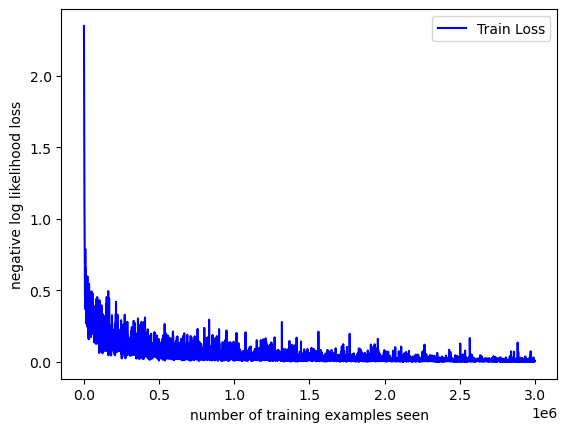

In [45]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
#fig

## Zahlen auf Beispieldaten erkennen

In [46]:
with torch.no_grad():
    flat_data = torch.flatten(example_data, start_dim=1)
    raw_output = network(flat_data)
    output = torch.nn.functional.log_softmax(raw_output, dim=1)

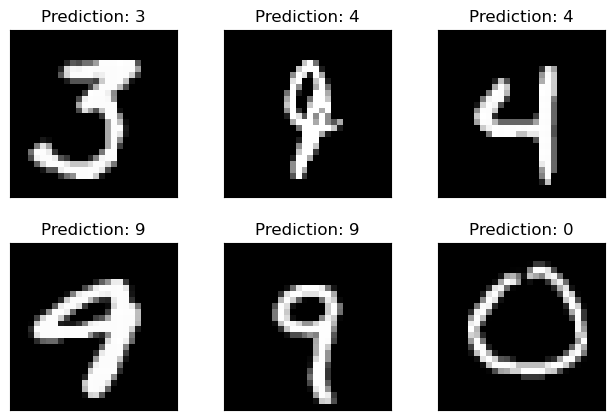

In [47]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
#fig

## Accuracy und Loss für das Netz errechnen

In [48]:
def test():
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
        flat_data = torch.flatten(data, start_dim=1)
        raw_output = network(flat_data)
        output = torch.nn.functional.log_softmax(raw_output, dim=1)
        
        test_loss += torch.nn.functional.nll_loss(output, target, size_average=False).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [49]:
test()


Test set: loss: 0.0688, Accuracy: 9799/10000 (98%)

